In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from portfolio_stats import PortfolioStats

from workflow.tools.utils import set_plot_style

set_plot_style()

In [21]:
kwargs = {
    "index_col": 0,
    "parse_dates": True
}

mv_rets = pd.read_csv("workflow/data/returns/mv_rets.csv", **kwargs)
mv_rets.columns = [f"MV_{col}" for col in mv_rets]

nn_lev_rets = pd.read_csv("workflow/data/returns/nn_lev_rets.csv", **kwargs)
nn_lev_rets.columns = [f"{col}_LVGD" for col in nn_lev_rets]

nn_unlev_rets = pd.read_csv("workflow/data/returns/nn_unlev_rets.csv", **kwargs)
nn_unlev_rets.columns = [f"{col}_UNLVGD" for col in nn_unlev_rets]

rets = pd.concat([mv_rets, nn_lev_rets, nn_unlev_rets], axis=1)

bm_rets = pd.read_csv("workflow/data/features.csv", **kwargs)["STOCKS_RET"].reindex(rets.index)

rets = pd.concat([bm_rets, rets], axis=1)

<Axes: xlabel='Date'>

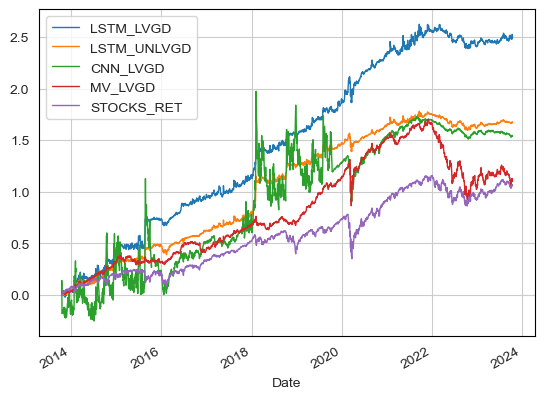

In [33]:
top_5_strats = rets.cumsum().iloc[-1].sort_values(ascending=False)[:5].index
rets[top_5_strats].cumsum().plot()

In [28]:
backtest_stats = PortfolioStats(rets, log=True).info

backtest_stats["ALPHA"] = backtest_stats["ANN_RET"] - backtest_stats.loc["STOCKS_RET", "ANN_RET"]
backtest_stats = backtest_stats.sort_values(by="ALPHA", ascending=False)
backtest_stats.applymap(lambda x: f"{x:,.3f}")

,SHARPE,CUMU_RET,ANN_RET,ANN_VOL,MAX_DD,ALPHA
LSTM_LVGD,1.064,2.499,0.250,0.235,-0.251,0.143
LSTM_UNLVGD,1.044,1.674,0.167,0.160,-0.183,0.061
CNN_LVGD,0.196,1.539,0.154,0.784,-1.148,0.047
MV_LVGD,0.561,1.110,0.111,0.198,-0.784,0.004
STOCKS_RET,0.597,1.068,0.107,0.179,-0.431,0.000
FCN_LVGD,0.098,0.759,0.076,0.779,-1.149,-0.031
FCN_UNLVGD,0.326,0.525,0.053,0.161,-0.492,-0.054
CNN_UNLVGD,0.059,0.330,0.033,0.555,-0.942,-0.074
MV_EW,0.111,0.305,0.030,0.275,-0.310,-0.076
MV_UNLVGD,0.561,0.278,0.028,0.049,-0.196,-0.079
